<a href="https://colab.research.google.com/github/pedroblossbraga/supportvectormachines_tcc/blob/master/TCC_SVC_margem_suave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

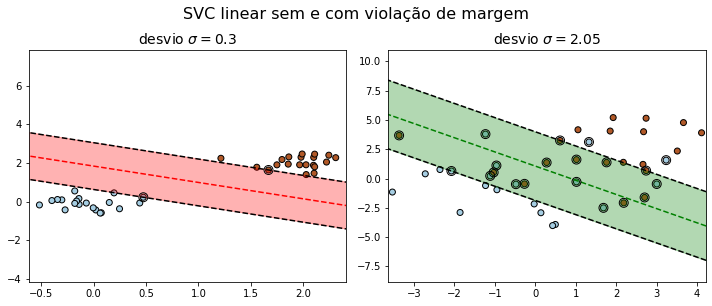

In [24]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from sklearn import svm
from sklearn.datasets import make_blobs


def plot_clf_decision_func(clf, color, marker='None'):
  w = clf.coef_[0]
  a = -w[0] / w[1]
  xx = np.linspace(-5, 5)
  yy = a * xx - (clf.intercept_[0]) / w[1] # hiperplano de separação

  # calculando a margem
  margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))

  # paralelas ao hiperplano de separação
  yy_down = yy - np.sqrt(1 + a ** 2) * margin # hiperplano inferior
  yy_up = yy + np.sqrt(1 + a ** 2) * margin # hiperplano superior

  # linhas do hiperplano de decisão
  plt.plot(xx, yy, linestyle = "--", 
           marker=marker,
           color=color)
  
  # hiperplanos de suporte inferior e superior
  plt.plot(xx, yy_down, "k--", color='k')
  plt.plot(xx, yy_up, "k--", color='k')

  # preenchendo a margem
  plt.fill_between(
      xx,
      yy_down,
      yy_up,
      alpha=0.3,
      color=color
  )
  # vetores de suporte, mais próximos da margem
  plt.scatter(
          clf.support_vectors_[:, 0],
          clf.support_vectors_[:, 1],
          s=80,
          facecolors="none",
          zorder=10,
          edgecolors="k",
          cmap=cm.get_cmap("RdBu"),
      )
      
def get_acc(X, y, clf):
  y_pred = clf.predict(X)
  return sum(y==y_pred)/y.shape[0]


def generate_dataset(
    n_samples_1 = 20,
    n_samples_2 = 20,
    centers = [[0.0, 0.0], [1.0, 2.0]],
    clusters_std = [2.05, 2.05],
):
  X, y = make_blobs(
      n_samples=[n_samples_1, n_samples_2],
      centers=centers,
      cluster_std=clusters_std,
      random_state=42,
      shuffle=False,
  )
  return X, y


plt.figure(figsize=(10,4))
# ------------------------------------------------------------------------------
plt.subplot(1,2,1)

X,y = generate_dataset(
    clusters_std = [0.3, 0.3],
    centers = [[0.0, 0.0], [2.0, 2.0]]
)
plt.title('desvio $\sigma = 0.3$', fontsize = 14)

# SVC linear
clf1 = svm.SVC(kernel="linear")
clf1.fit(X, y)
acc1 = get_acc(X, y, clf1)

# plotando as amostras
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors="k")

# plotando as funções de decisão lineares
plot_clf_decision_func(clf1, color = 'red')

plt.xlim([X[:, 0].min() - 0.1,
          X[:, 0].max() + 0.1])
# ------------------------------------------------------------------------------
plt.subplot(1,2,2)

X,y = generate_dataset(
    clusters_std = [2.05, 2.05],
    centers = [[0.0, 0.0], [2.0, 2.0]]
)

plt.title('desvio $\sigma = 2.05$', fontsize = 14)

# SVC linear
clf2 = svm.SVC(kernel="linear")
clf2.fit(X, y)
acc2 = get_acc(X, y, clf2)

# plotando as amostras
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors="k")

# plotando as funções de decisão lineares
plot_clf_decision_func(clf2, color = 'green') 

plt.xlim([X[:, 0].min() - 0.1,
          X[:, 0].max() + 0.1])

plt.suptitle('SVC linear sem e com violação de margem', 
             fontsize = 16,
             y = 1.05)
plt.tight_layout()
plt.show()